Import necessary libraries

In [1]:
!pip install pgmpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 19.6 MB/s eta 0:00:00


In [2]:
from pgmpy.models import MarkovModel
from pgmpy.factors.discrete import DiscreteFactor
from pgmpy.inference import Mplp
import networkx as nx
import matplotlib.pyplot as plt

Define the structure of the Markov Random Field (MRF)

This is an undirected graph, unlike the directed graph in the Bayesian Network

In [5]:
model_mrf = MarkovModel()

Adding nodes for the variables. This is not a real example of MRF but it is only used for comparison of MRF with Bayesian Network

In [6]:
model_mrf.add_nodes_from(['Burglary', 'Earthquake', 'Alarm', 'JohnCalls', 'MaryCalls'])

Adding edges (undirected)

We assume that burglary and earthquake can influence the alarm, and the alarm can influence John and Mary calling

In [7]:
model_mrf.add_edges_from([('Burglary', 'Alarm'),
                          ('Earthquake', 'Alarm'),
                          ('Alarm', 'JohnCalls'),
                          ('Alarm', 'MaryCalls')])

Define Potential Functions (Cliques).

In an MRF, potential functions define the interaction between the nodes (cliques).

We'll define these as simple factors

Clique 1: Burglary and Alarm

In [10]:
factor_burglary_alarm = DiscreteFactor(['Burglary', 'Alarm'], cardinality=[2, 2],
                                       values=[0.95, 0.05, 0.94, 0.06])  # 4 values

Clique 2: Earthquake and Alarm

In [12]:
factor_earthquake_alarm = DiscreteFactor(['Earthquake', 'Alarm'], cardinality=[2, 2],
                                         values=[0.95, 0.05, 0.29, 0.71])  # 4 values

Clique 3: Alarm and JohnCalls

In [13]:
factor_alarm_john = DiscreteFactor(['Alarm', 'JohnCalls'], cardinality=[2, 2],
                                   values=[0.90, 0.10, 0.05, 0.95])

Clique 4: Alarm and MaryCalls

In [14]:
factor_alarm_mary = DiscreteFactor(['Alarm', 'MaryCalls'], cardinality=[2, 2],
                                   values=[0.70, 0.30, 0.01, 0.99])

Add the factors (potential functions) to the model

In [15]:
model_mrf.add_factors(factor_burglary_alarm, factor_earthquake_alarm, factor_alarm_john, factor_alarm_mary)

Perform inference on the MRF using Max-Product Belief Propagation (MPLP)

In [16]:
mplp_inference = Mplp(model_mrf)

Visualizing the Markov Random Field (Undirected Graph)

Using NetworkX and Matplotlib to visualize the undirected graph structure

In [21]:
# Check nodes and edges in the graph
print("Nodes:", model_mrf.nodes())
print("Edges:", model_mrf.edges())

Nodes: ['Burglary', 'Earthquake', 'Alarm', 'JohnCalls', 'MaryCalls']
Edges: [('Burglary', 'Alarm'), ('Earthquake', 'Alarm'), ('Alarm', 'JohnCalls'), ('Alarm', 'MaryCalls')]


Nodes: ['Burglary', 'Earthquake', 'Alarm', 'JohnCalls', 'MaryCalls']
Edges: [('Burglary', 'Alarm'), ('Earthquake', 'Alarm'), ('Alarm', 'JohnCalls'), ('Alarm', 'MaryCalls')]


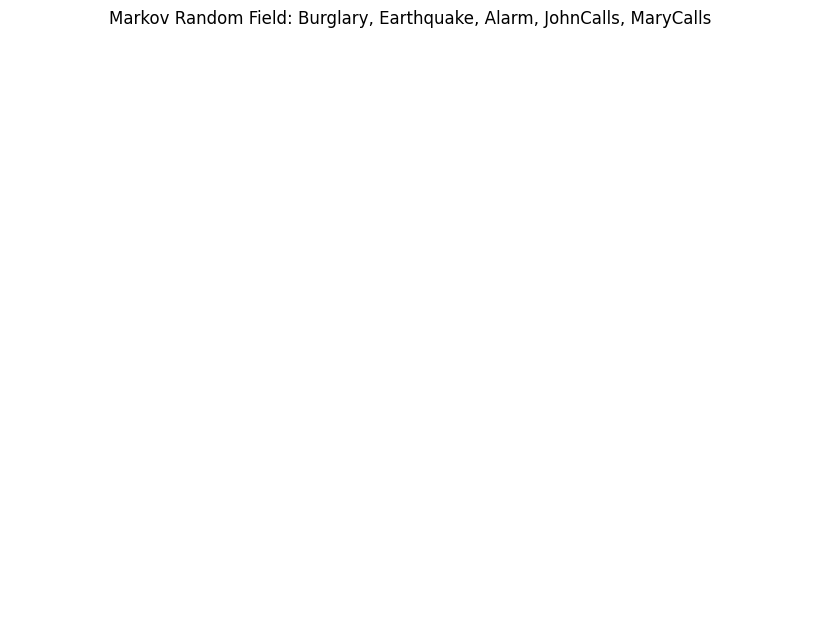

In [22]:
import networkx as nx
import matplotlib.pyplot as plt

# Assuming model_mrf is the Markov Random Field graph
# Check that the graph is valid
print("Nodes:", model_mrf.nodes())
print("Edges:", model_mrf.edges())

# Generate a layout for the MRF (this computes node positions)
pos = nx.spring_layout(model_mrf)  # Try circular_layout or shell_layout if spring_layout doesn't work

# Visualize the Markov Random Field using the layout
plt.figure(figsize=(8, 6))
nx.draw(model_mrf, pos, with_labels=True, node_size=2000, node_color="lightgreen",
        font_size=10, font_weight="bold")

plt.title("Markov Random Field: Burglary, Earthquake, Alarm, JohnCalls, MaryCalls")
plt.show()

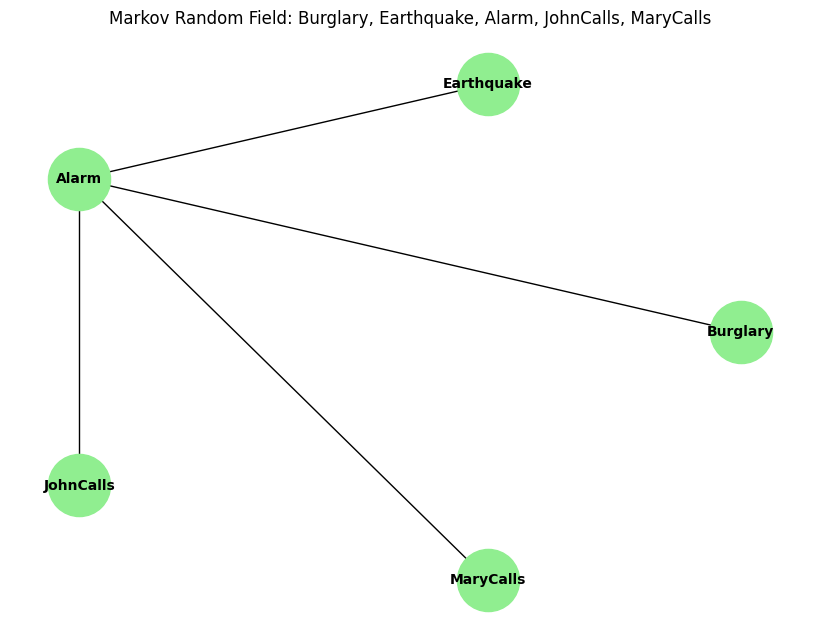

In [23]:
pos = nx.circular_layout(model_mrf)

plt.figure(figsize=(8, 6))
nx.draw(model_mrf, pos, with_labels=True, node_size=2000, node_color="lightgreen",
        font_size=10, font_weight="bold")

plt.title("Markov Random Field: Burglary, Earthquake, Alarm, JohnCalls, MaryCalls")
plt.show()

In [24]:
if nx.is_empty(model_mrf):
    print("Graph is empty!")
else:
    print("Graph is not empty.")

Graph is not empty.
